In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
boston=load_boston()

In [44]:
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos['price']=boston.target
bos=bos.sample(frac=1,random_state=4).reset_index(drop=True)

In [45]:
y=bos['price']
x=bos.drop(['price','INDUS','AGE'],axis=1)

In [46]:
import statsmodels.api as sm
xc=sm.add_constant(x)

In [47]:
model=sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          5.54e-137
Time:                        21:51:37   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3411      5.067      7.171      0.000      26.385      46.298
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
RM             3.8016      0.406      9.356      0.000       3.003       4.600
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
B              0.0093      0.003      3.475      0.001       0.004       0.015
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

D:\DataScience\Workspace\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


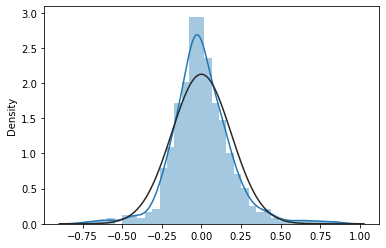

In [43]:
#Assumption 1: Normality of Residuals Important -2
from scipy.stats import norm
residuals=model.resid
norm.fit(residuals)
sns.distplot(residuals,fit=norm)
plt.show()
#Black line is normal distribution

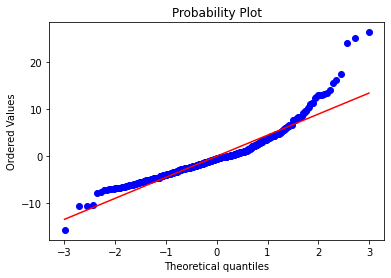

In [23]:
#Plotting QQ plot
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [25]:
#Hypothesis Test : Jarque-Bera Test
print(stats.jarque_bera(residuals))
# H0-Data is normal 
#H1-Data is not normal
#since pvalue=0 ,we will reject H0 and conclude residuals are not noraml

Jarque_beraResult(statistic=787.7851418746452, pvalue=0.0)


In [39]:
#Appling logarithm to y value
lny=np.log(y)
model=sm.OLS(lny,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     168.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):          4.31e-159
Time:                        21:49:21   Log-Likelihood:                 129.02
No. Observations:                 506   AIC:                            -234.0
Df Residuals:                     494   BIC:                            -183.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0837      0.203     20.112      0.000       3.685       4.483
CRIM          -0.0103      0.001     -7.856      0.000      -0.013      -0.008
ZN             0.0011      0.001      2.007      0.045    2.28e-05       0.002
CHAS           0.1051      0.034      3.072      0.002       0.038       0.172
NOX           -0.7217      0.142     -5.095      0.000      -1.000      -0.443
RM             0.0907      0.016      5.569      0.000       0.059       0.123
DIS           -0.0517      0.007     -6.948      0.000      -0.066      -0.037
RAD            0.0134      0.003      5.293      0.000       0.008       0.018
TAX           -0.0006      0.000     -4.129      0.000      -0.001      -0.000
PTRATIO       -0.0374      0.005     -7.237      0.000      -0.048      -0.027
B              0.0004      0.000      3.852      0.000       0.000       0.001
LSTAT         -0.0286      0.002    -15.053      0.000      -0.032      -0.025
==============================================================================
Omnibus:                       59.445   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.361
Skew:                           0.459   Prob(JB):                     4.26e-50
Kurtosis:                       6.153   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

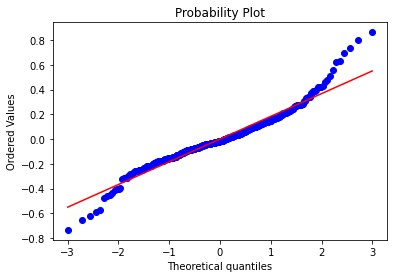

In [40]:
#Plotting QQ plot
residuals=model.resid
import scipy.stats as stats
stats.probplot(residuals,plot=plt)
plt.show()

In [29]:
#Hypothesis Test : Jarque-Bera Test
print(stats.jarque_bera(residuals))

Jarque_beraResult(statistic=227.36073522664483, pvalue=0.0)


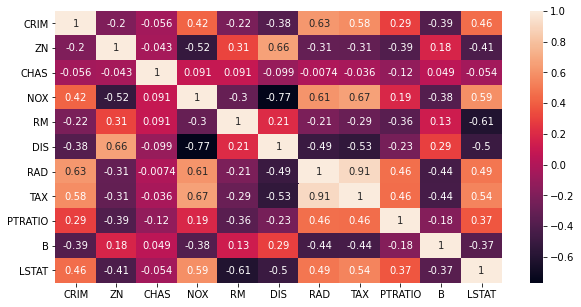

In [31]:
#Assumption 2: Multicolinearity --Imortant 1
plt.figure(figsize=(10,5))
sns.heatmap(x.corr(),annot=True)
plt.show()

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf=[vif(xc.values,i)for i in range(xc.shape[1])]
pd.DataFrame(vf,index=xc.columns,columns=['vif'])

,vif
const,579.255845
CRIM,1.789704
ZN,2.239229
CHAS,1.059819
NOX,3.778011
RM,1.834806
DIS,3.443420
RAD,6.861126
TAX,7.272386
PTRATIO,1.757681


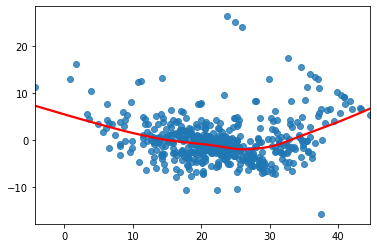

In [51]:
#Assumption 3:Constant variance of residuals ( Homoscedasticity )
residuals=model.resid
y_pred=model.predict(xc)
sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.show()

In [53]:
import statsmodels.stats.api as sms
test=sms.het_goldfeldquandt(y=model.resid,x=xc)
test
#H0 Variance is constant across the rango of data
#H1 variance is not constant across the range of data
#since p=0.999 we will accept the null hypothesis to conclude that variance is constant

(0.6703137867693927, 0.9990040973476998, 'increasing')

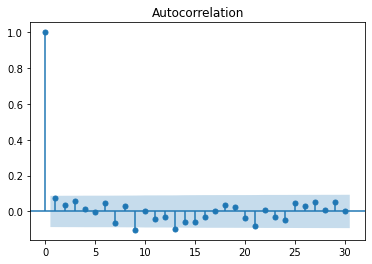

In [55]:
#Assumption 4:Auto correlation
residuals=model.resid
import statsmodels.tsa.api as smt # tsa :Time series Analysis
smt.graphics.plot_acf(residuals,lags=30)
plt.show()
#ACF plot indicate that all correlation are in insignificant region.ALso DW value is 1.850 (close to 2).we conclude there is not autocorrelation

In [ ]:
#Assumptiom 5: Linearity of Relationship
import statsmodls.api as sm
sm.stats.diagonistics.linear_rainbow(model,frac=0.5)

In [ ]:
Since pval is higher than significance level.we accept Null Hypothesis